Text(0.5, 1, 'Column pairs with correlation coefficient higher than 0.6')

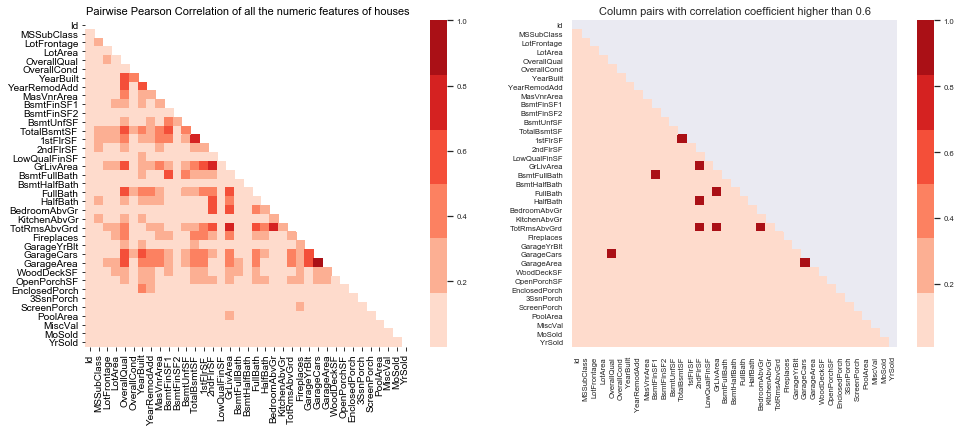

In [11]:
#drop target varribale

df_no_SP = df.drop('SalePrice',axis=1)
corr_all = abs(df_no_SP.corr())


# Thresholding the correlations larger than 0.6 (or-0.6) 
corr_all_true = corr_all>0.6 
corr_all_true = corr_all_true

corr_dict = {}
for column in corr_all_true:
    corr_list = corr_all_true[column][corr_all_true[column]==True].index.tolist()
    corr_dict[column] = corr_list

# pprint.pprint(corr_dict)

# create custom color map
cmap = sns.color_palette("Reds")
fig1 = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
# Generate a mask for the upper triangle
sns.set(font_scale=0.7)
mask = np.zeros_like(corr_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, mask=mask, cmap=cmap,
          xticklabels=corr_all.columns.values,
          yticklabels=corr_all.columns.values)
plt.title('Pairwise Pearson Correlation of all the numeric features of houses',fontsize=11)


# fig2 = plt.figure()
plt.subplot(1,2,2)
sns.heatmap(corr_all_true,mask=mask,cmap=cmap,
           xticklabels=corr_all_true.columns.values,
           yticklabels=corr_all_true.columns.values,
           vmin=0.01,vmax=1)

plt.title('Column pairs with correlation coefficient higher than 0.6',fontsize=11)

In [12]:

# Build a list of all the numeric column names for our dataframe, except SalePrice
num_cols_all = list(corr_all.columns)
# print(cols)
cols = num_cols_all

# See how many columns there are at first
len_1=len(num_cols_all)
removed_features=[]
# In the correlation dictionary, if the key is still in the columns_list, remove the items in the value from the columns_list that is not equal
# to the key itself.
for key, value in corr_dict.items():
    if key in cols:
        for feature in value:
            if (feature in cols) & (feature != key and feature != 'YearBuilt'):#keep year built
                cols.remove(feature)
                removed_features.append(feature)
# Take a look how many features (columns) are removed from the last step.
len_2 = len(cols)

df = df.drop(removed_features,axis=1)
print('There are',len(removed_features),'features removed for high pairwise correlation:\n\n',removed_features)

There are 6 features removed for high pairwise correlation:

 ['GarageCars', 'BsmtFullBath', '1stFlrSF', 'GrLivArea', 'HalfBath', 'TotRmsAbvGrd']
